# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

ID                             int64
OPEID                          int64
Institution Name              object
City                          object
State                         object
Foreign Gift Received Date     int64
Foreign Gift Amount            int64
Gift Type                     object
Country of Giftor             object
Giftor Name                   object
dtype: object 

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64
Max value: 99999999
99th percentile: 7568696.199999988


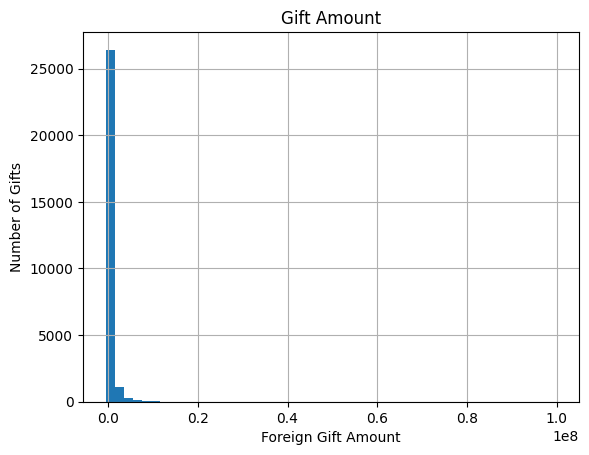

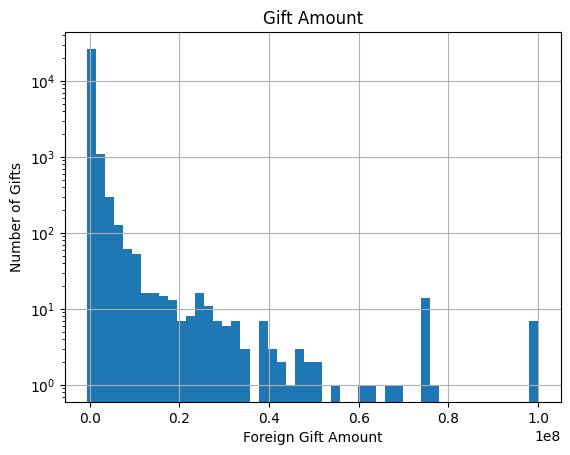

monetary proportion: 0.3875128450444704
contract proportion: 0.6120973742957372
real estate proportion: 0.00038978065979235324


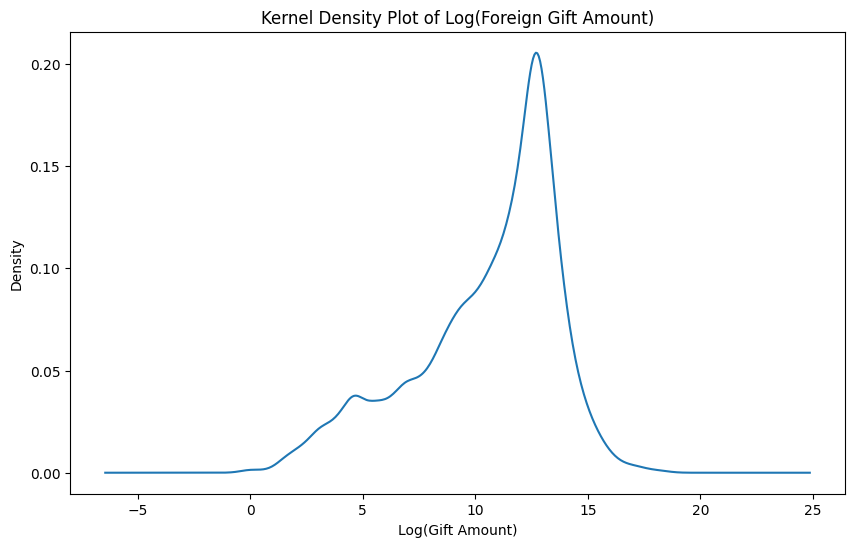

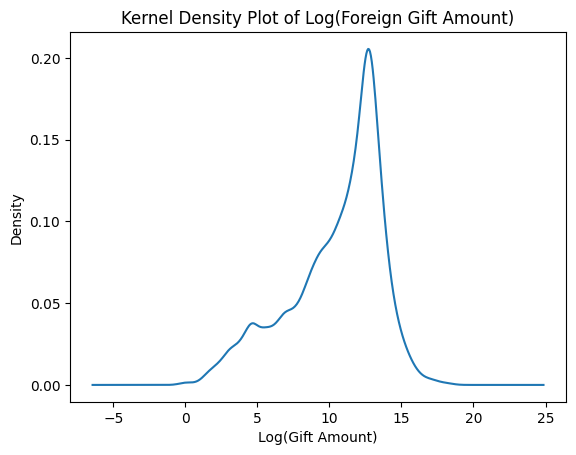

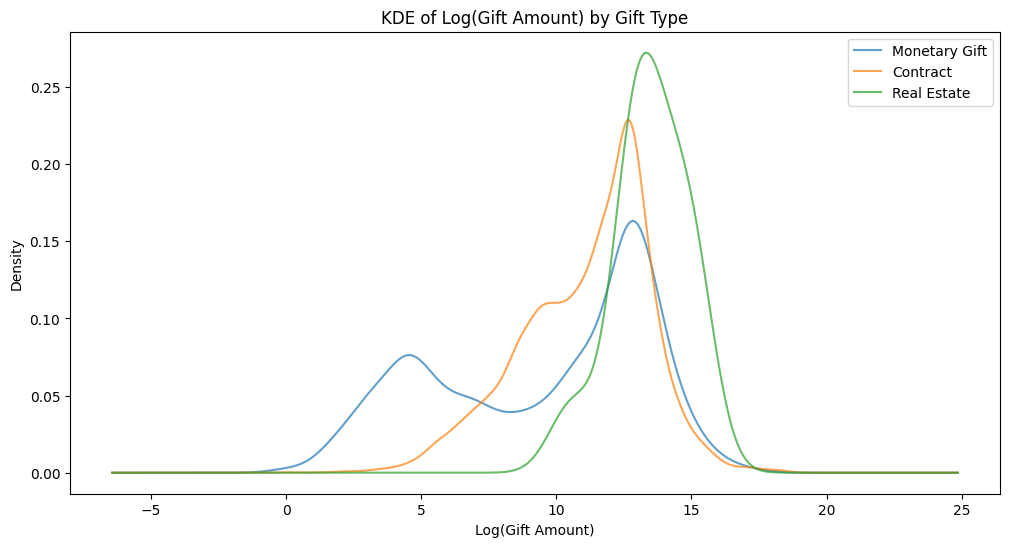

The top 15 countries in terms of number of gifts given: Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                2484092

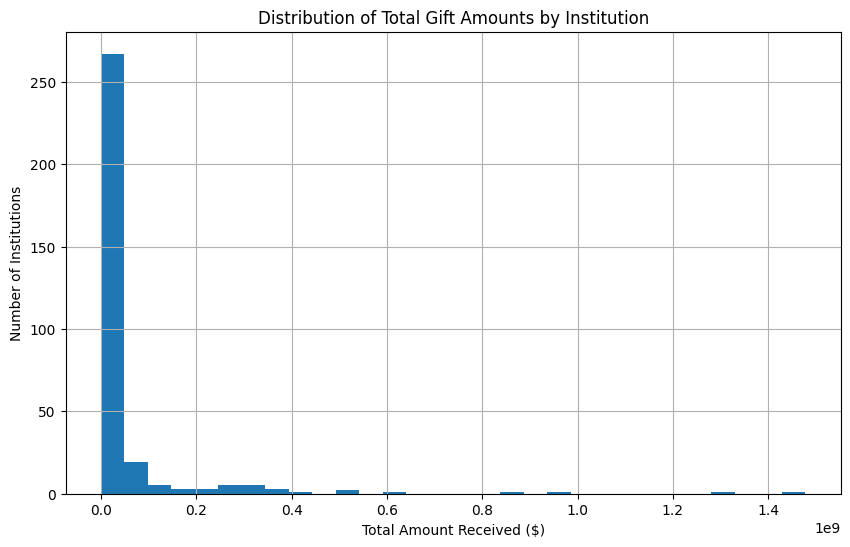

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('/content/ForeignGifts_edu.csv',low_memory=False) #not sure if this is too big to load . . . it worked so i think its fine
print(df.dtypes, '\n') #also not sure but i think

print(df['Foreign Gift Amount'].describe())
print(f"Max value: {df['Foreign Gift Amount'].max()}")
print(f"99th percentile: {df['Foreign Gift Amount'].quantile(0.99)}")

#regular graph
df['Foreign Gift Amount'].dropna().hist(bins=50)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Number of Gifts')
plt.title('Gift Amount')
plt.show()


#Create foreign gift amount histogram and describe findings (log)
df['Foreign Gift Amount'].dropna().hist(bins=50)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Number of Gifts')
plt.title('Gift Amount')
plt.yscale('log')  # or plt.xscale('log') for log x-axis
plt.show()


#creat a histogram or value counts table of gift type, what proportion are contracts, real estate, and monetary gifts

counts = df['Gift Type'].value_counts()
monetary_proportion = counts['Monetary Gift'] / counts.sum()
contract_proportion = counts['Contract'] / counts.sum()
real_estate_proportion = counts['Real Estate'] / counts.sum()
print(f'monetary proportion: {monetary_proportion}')
print(f'contract proportion: {contract_proportion}')
print(f'real estate proportion: {real_estate_proportion}')
#Create a kernel density plot of the log of Foreign Gift Amount, and then a kernel density plot of the log of Foreign Gift Amount conditional on gift type. Do you notice any patterns?
x = np.log(df[df['Foreign Gift Amount'] > 0]['Foreign Gift Amount'])


# Calculate the necessary statistics
N = len(x)  # Number of observations
sd = np.std(x)  # Standard deviation
min_x = np.min(x)  # Minimum value
max_x = np.max(x)  # Maximum value
# 1. Overall KDE of log(Foreign Gift Amount)
x = np.log(df[df['Foreign Gift Amount'] > 0]['Foreign Gift Amount']).values

def normal_kernel(center, bandwidth):
    """ Normal kernel function. """
    density = np.exp(-(((grid-center)/bandwidth)**2)/2) / (bandwidth * np.sqrt(2*np.pi))
    return density

h = 1.06 * sd * N**(-1/5)  # Silverman's plug-in bandwidth
M = 500
grid = np.linspace(min_x-2*sd, max_x+2*sd, M)

kde = 0*grid
for i in range(len(x)): #compute kernel function for each data point but NOT graph becaues that takes forever to run
    density = normal_kernel(x[i], h)
    kde += density
kde = kde/N

plt.figure(figsize=(10, 6))
plt.plot(grid, kde)
plt.title("Kernel Density Plot of Log(Foreign Gift Amount)")
plt.xlabel('Log(Gift Amount)')
plt.ylabel('Density')
plt.show()


# Just plot the final result
fig = sns.lineplot(x=grid, y=kde)
fig.set(title="Kernel Density Plot of Log(Foreign Gift Amount)",
        xlabel='Log(Gift Amount)', ylabel='Density')
plt.show()
#fig = sns.lineplot(x=grid,y=kde) # Our KDE estimator
#ig.set(title="Our Kernel Density Plot", xlabel='x', ylabel='$\\hat{f}(x)$')

plt.figure(figsize=(12, 6))

#list of the known gift types
gift_types = ['Monetary Gift', 'Contract', 'Real Estate']

for gift_type in gift_types:
    # Filter data: only this specific gift type AND positive amounts
    subset = df[(df['Gift Type'] == gift_type) & (df['Foreign Gift Amount'] > 0)]

    if len(subset) > 10:  # Make sure we have enough data points
        # Take log of amounts for THIS gift type only
        x_type = np.log(subset['Foreign Gift Amount']).values

        # Calculate KDE parameters for this subset
        N_type = len(x_type)
        sd_type = np.std(x_type)
        h_type = 1.06 * sd_type * N_type**(-1/5)

        # Compute KDE for this gift type
        kde_type = 0*grid
        for i in range(len(x_type)):
            density = normal_kernel(x_type[i], h_type)
            kde_type += density
        kde_type = kde_type/N_type

        # Plot this gift type's KDE
        plt.plot(grid, kde_type, label=gift_type, alpha=0.7)

plt.title("KDE of Log(Gift Amount) by Gift Type")
plt.xlabel('Log(Gift Amount)')
plt.ylabel('Density')
plt.legend()
plt.show()
#What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
top_15_countries = df['Country of Giftor'].value_counts().head(15)
print(f'The top 15 countries in terms of number of gifts given: {top_15_countries}')

top_15_by_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_15_by_amount)
#What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
top_15_by_recieved = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_15_by_recieved)
# Get total for each institution
institution_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()

# Histogram showing distribution of all institutions
plt.figure(figsize=(10, 6))
institution_totals.hist(bins=30)
plt.xlabel('Total Amount Received ($)')
plt.ylabel('Number of Institutions')
plt.title('Distribution of Total Gift Amounts by Institution')
plt.show()

#Which giftors provide the most money, in total?
#just get the total that is given by any country
top_15_by_amount_total = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_15_by_amount_total)


2. When you first graph the histogram all of the values are clustered together at 0 and it appears those are the only monetary values that have gifts. Upon further investigation and finding the min and max of the data this occurs because most gifts are cheaper (under 500k) however there is a gift that is 100 million dollars. This outlier makes it difficult to see all the values. For this reason I graphed the histogram on a log scale that way it was easier to visualize all the values. You can see visually how in graph two you can better see all the values on it vs. graph one where it appears they are all around 0.

3. monetary proportion: 0.3875128450444704
contract proportion: 0.6120973742957372
real estate proportion: 0.00038978065979235324

4**. All of the values have their tallest peak a bit skewed right but they have a smaller hump on their graphs as well????????**

5. Top 15 countries in terms of number of gifts given:
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381

Top 15 countries in terms of amount gifted
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202

6. Top 15 insitutions and how much they recieved
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419

The histogram created ______.
7. Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

            Host Id  Review Scores Rating (bin)       Zipcode          Beds  \
count  3.047800e+04                22155.000000  30344.000000  30393.000000   
mean   1.273171e+07                   90.738659  10584.854831      1.530089   
std    1.190270e+07                    9.059519    921.299397      1.015359   
min    5.000000e+02                   20.000000   1003.000000      0.000000   
25%    2.701298e+06                   85.000000  10017.000000      1.000000   
50%    8.551693e

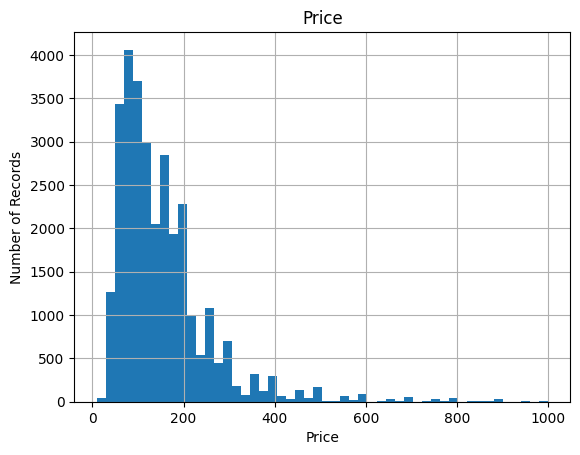

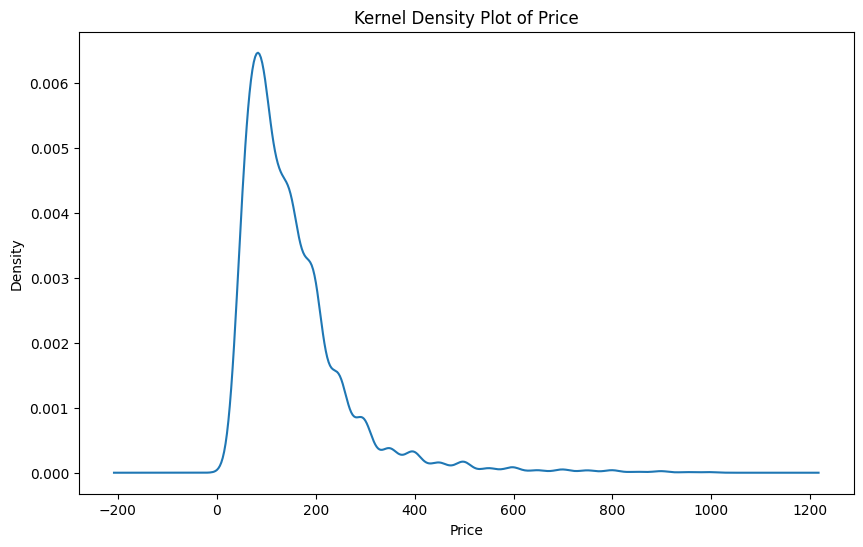

,Price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#(1) What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.
df = pd.read_csv('/content/airbnb_hw.csv')
print(df.dtypes, '\n')
print(df.describe())
df.head(20)
print(len(df))


#(2) Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

cross_tab = pd.crosstab(df['Room Type'], df['Property Type'])
print(cross_tab)

#
#(3) For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')
print(df['Price'].describe())
df['Price'].dropna().hist(bins=50)
plt.xlabel('Price')
plt.ylabel('Number of Records')
plt.title('Price')
plt.show()



x = df[df['Price'] > 0]['Price'].values  # Keep only this line

N = len(x)
sd = np.std(x)
min_x = np.min(x)
max_x = np.max(x)

def normal_kernel(center, bandwidth):
    """ Normal kernel function. """
    density = np.exp(-(((grid-center)/bandwidth)**2)/2) / (bandwidth * np.sqrt(2*np.pi))
    return density

h = 1.06 * sd * N**(-1/5)
M = 500
grid = np.linspace(min_x-2*sd, max_x+2*sd, M)

kde = 0*grid
for i in range(len(x)):
    density = normal_kernel(x[i], h)
    kde += density
kde = kde/N

plt.figure(figsize=(10, 6))
plt.plot(grid, kde)
plt.title("Kernel Density Plot of Price")
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


df['Price'].describe()

#(4)Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

#(5)Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

#(6) We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

1. There are 30478 observations. The data has dimensions of 30478 X 13 columns. The variables that are included and make up the 13 columns are Host Id                             int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64

2. Apartments dominate the market with over 27,000 total listings, split fairly evenly between entire homes (15,669) and private rooms (10,748). This suggests apartments are the most common property type for short-term rentals.

Most property types favor entire home rental. For chalets, castles, huts, treehouses, tents it is more likely to geta private room then rent the whole house.

Private rooms outnumber entire home rentals for these property types:

Bed & Breakfasts (155 private vs. 13 entire) - Aligns with the B&B business model
Dorms (16 private vs. 4 entire) - Designed for shared living
Houses (1,258 private vs. 752 entire) - Homeowners renting spare rooms
Castles (1 private vs. 0 entire) - Though this is just one listing!
Chalets (1 private vs. 0 entire) - Also just one listing

For Villas, you're correct that there's 1 private room listing, but there are actually 4 entire home listings, so entire homes are more common for villas.



3. The Price variable exhibits poor scaling characteristics. With a mean of $153.36 and a standard deviation of $108.90, the data shows high variability, as the standard deviation is over 70% of the mean. The distribution is right-skewed, evidenced by the mean ($153.36) being notably higher than the median ($125), indicating that extreme high values are pulling the average upward. The range spans from $10 to $999, representing a very wide spread of $989. This large range combined with the skewness creates visualization challenges, as seen in the histogram where most data points are compressed into a small area on the left side of the plot while a few extreme outliers stretch the scale.



**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.